# <center><font color=navy> Machine Learning from Theory to Practice</font></center>
## <center><font color=navy>Kernel Methods: Support Vector Machines (SVM)</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
 <center> habibnia@vt.edu </center> 

A Support Vector Machine (SVM) is a very powerful and versatile algorithm, capable of performing linear or nonlinear classification (SVC), regression (SVR), and even outlier detection. It is one of the most popular models in Machine Learning, and anyone interested in Machine Learning should have it in their toolbox. SVMs are particularly well suited for classification of complex but small- or medium-sized
datasets.

In this notebook we are going to talk about Support Vector Machines. Later, we are going to talk about the history of Machine Learning and Deep Learning in more details, but for now bear in mind that before the widespread success of Neural Networks, SVM was the method of choice for many problem.

But why do we still learn about SVM if Neural Networks are seemingly better. Well, that's because it is not always the case. Deep learning is **not** a panacea. 

Each machine learning algorithm has a different inductive bias, so it's not always appropriate to use neural networks. For example a linear trend will always be learned best by simple linear regression rather than a ensemble of nonlinear networks. 


Recall **No Free Launch** theorem: No single algorithm rules them all; you've got to benchmark! However, the obvious rebuttal here is that you usually don't care about all possible problems, and deep learning seems to work well on several classes of problems that people do care about (e.g., object recognition), and so it's a reasonable first/only choice for other applications in those domains.

If you take a look at the winners of past Kaggle competitions, except any challenges with image/video data, you will quickly find that neural networks are not the solution to everything. Some past solutions can be found [here](http://ndres.me/kaggle-past-solutions/).

Simply put, learning about SVM is very beneficial, hence its inclusion in curriculum of most ML courses. Introduced a little more than 50 years ago, SVM has been continously evolved over time.


## Can you spot the machanism?

* Notice how the line are moving. Can you explain the mechanism?
* The initial separating boundary already distinguishes the samples perfectly. Why would the lines move in this regard?

![SVM Animation](https://drive.google.com/uc?export=view&id=1T0F97906W_0yr8nco04lySRkfcQfs2gA)

## Separability and Generalization

Remember that the worth of a classifier is not in how well it separates the training data. We eventually want it to classify yet-unseen data points (known as test data). Given that, we want to choose a line that captures the general pattern in the training data, so there is a good chance it does well on the test data. You have probably guessed that we are talking about Generalization capability of the model.

Take a look at the plot below with test points shown as squares:

![SVM1](https://drive.google.com/uc?export=view&id=1Nee1yv8-O57xBQHHV6HxSP6ucb5K3FjC)

You can see how the separating line in the left picture seems a bit skewed? As if the the lower half runs too close to the red cluster. They both perfectly classify the training samples, but the classification boundary of the right picture, on the other hand, stays as far away as possible from both the clusters while getting the training data separation right. By being right in the middle of the two clusters, it is less “risky” and gives the data distributions for each class some wiggle room, so to speak, and thus hopefully generalizes better on test data. SVMs try to find the second kind of line!

Support Vector Machines give you a way to pick between many possible classifiers in a way that guarantees a higher chance of correctly labeling your test data. While the above plot shows a line and data in two dimensions, it must be noted that SVMs work in any number of dimensions; and in these dimensions, they find the analogue of the two-dimensional line. For example, in three dimensions they find a *plane* , and in higher dimensions they find a *hyperplane*.

Data that can be separated by a line (or in general, a hyperplane) is known as linearly separable data. The hyperplane acts as a linear classifier.

> **Support vectors** are the data points that lie closest to the decision surface (or hyperplane), hence the name of the model. They are the data points most difficult to classify. They have direct bearing on the optimum location of the decision surface.

You can think of an SVM classifier as fitting the
widest possible street (represented by the parallel dashed lines) between the classes. This is called large
margin classification. Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is
fully determined (or “supported”) by the instances located on the edge of the street (aka support vectors).

As you can deduce from the plots, SVMs are sensitive to the feature scales. Take this into account when you want to apply SVM to your dataset.

![SVM Scaling](https://drive.google.com/uc?export=view&id=16g849JpgJ0eEaM5abSiTKb8cHlTCWcIS)

## Allowing for Errors

Above, we looked at an easy case of perfectly linearly separable data. Real-world data is, however, typically messy. You will almost always have a few instances that a linear classifier can’t get right.

Here’s an example of such data:

![SVM1](https://drive.google.com/uc?export=view&id=1ZqFB7sN9cvjh-QWWnE7Zx_ypaxGD0erg)

Clearly, if we are using a linear classifier, we are never going to be able to perfectly separate the labels. We also don’t want to discard the linear classifier altogether because it does seem like a good fit for the problem except for a few errant points.

How do SVMs deal with this? They allow you to specify how many errors you are willing to accept.

You can provide a parameter called $C$ to your SVM; this allows you to dictate the tradeoff between:

* Having a wide margin.
* Correctly classifying training data. A higher value of $C$ implies you want lesser errors on the training data.

It bears repeating that this is a **tradeoff**. You get better classification of training data at the expense of a wide margin.

The following plots show how the classifier and the margin vary as we increase the value of $C$ (support vectors not shown):

![SVM1](https://drive.google.com/uc?export=view&id=1Pb4XQFzXYau03kf0yZTgNVcXWLQ91eqC)


Note how the line “tilts” as we increase the value of $C$. At high values, it tries to accommodate the labels of most of the red points present at the bottom right of the plots. This is probably not what we want for test data. The first plot with $C=0.01$ seems to capture the general trend better, although it suffers from a lower accuracy on the training data compared to higher values for $C$. Note how the width of the margin shrinks as we increase the value of $C$. Here, we see it’s not possible anymore to have both a good separating boundary and an associated point-free margin. Some points creep into the margin.

As you have probably guessed, $C$ is a hyperparameter. To find a proper value for $C$, one may typically use a technique like **cross-validation**.

## Algorithm

Before going forward with other interesting aspects of SVM, let's see how the algorithms works.

Let:

- $\mathbf{x}$ be a feature vector (i.e., the input of the SVM). $\mathbf{x} \in \mathbb{R}^n$, where $n$ is the dimension of the feature vector.
- $y$ be the class (i.e., the output of the SVM). $y \in \{ -1,1\}$, i.e. the classification task is binary. 
- $\mathbf{w}$ and $b$ be the parameters of the SVM: we need to learn them using the training set.
- $(\mathbf{x}^{(i)}, y^{(i)})$ be the $i^ {\text {th}}$ sample in the dataset. Let's assume we have $N$ samples in the training set.

With $n=2$, one can represent the SVM's decision boundaries as follows:

![SVM1](https://drive.google.com/uc?export=view&id=1I_7QTxtSozI-gS8hIM44AU3_VDI1DY8A)

The class $y$ is determined as follows:

$$ 
y^{(i)}=\left\{
                \begin{array}{ll}
                  -1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \leq -1 \\
                  1 &\text{ if } \mathbf{w^T}\mathbf{x}^{(i)}+b \ge 1 \\
                \end{array}
              \right.
$$

which can be more concisely written as $y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1$.

The SVM aims at satisfying two requirements:

1. The SVM should maximize the distance between the two decision boundaries. Mathematically, this means we want to maximize the distance between the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = -1$ and the hyperplane defined by $\mathbf{w^T}\mathbf{x}+b = 1$. This distance is equal to $\frac{2}{\|\mathbf{w}\|}$. This means we want to solve $\underset{\mathbf{w}}{\operatorname{max}} \frac{2}{\|\mathbf{w}\|}$. Equivalently we want
$\underset{\mathbf{w}}{\operatorname{min}} \frac{\|\mathbf{w}\|}{2}$.

2. The SVM should also correctly classify all $\mathbf{x}^{(i)}$, which means $y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1, \forall i \in \{1,\dots,N\}$


Which leads us to the following quadratic optimization problem:

$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1 &\forall i \in \{1,\dots,N\}
\end{align}$$

This is the **hard-margin SVM**, as this quadratic optimization problem admits a solution iff the data is linearly separable. 

One can relax the constraints by introducing so-called **slack variables** $\xi^{(i)}$. Note that each sample of the training set has its own slack variable. This gives us the following quadratic optimization problem:


$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\mathbf{x}^{(i)}+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}$$

This is the **soft-margin SVM**. $C$ is a hyperparameter called **penalty of the error term**.

One can add even more flexibility by introducing a function $\phi$ that maps the original feature space to a higher dimensional feature space. This allows non-linear decision boundaries. The quadratic optimization problem becomes:

$$\begin{align}
\min_{\mathbf{w},b}\quad &\frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \xi^{(i)}, \\
s.t.\quad&y^{(i)} (\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b) \ge 1 - \xi^{(i)},&\forall i \in \{1,\dots,N\} \\
\quad&\xi^{(i)}\ge0, &\forall i \in \{1,\dots,N\} 
\end{align}$$


### Optimization

The quadratic optimization problem can be transformed into another optimization problem named the **Lagrangian dual problem** (the previous problem is called the **primal**):


$$\begin{align}
\max_{\mathbf{\alpha}}  \quad &\min_{\mathbf{w},b}  \frac{\|\mathbf{w}\|}{2}+ C \sum_{i=1}^{N} \alpha^{(i)} \left(1-\mathbf{w^T}\phi \left(\mathbf{x}^{(i)}\right)+b)\right), \\
s.t. \quad&0 \leq  \alpha^{(i)} \leq C, &\forall i \in \{1,\dots,N\} 
\end{align}$$

This optimization problem can be simplified (by setting some gradients to $0$) to:

$$\begin{align}
\max_{\mathbf{\alpha}}  \quad & \sum_{i=1}^{N} \alpha^{(i)} - \sum_{i=1}^{N}\sum_{j=1}^{N}  \left( y^{(i)}\alpha^{(i)}\phi\left(\mathbf{x}^{(i)}\right)^T \phi\left(\mathbf{x}^{(j)}\right) y^{(j)}\alpha^{(j)} \right), \\
s.t. \quad&0 \leq  \alpha^{(i)} \leq C, &\forall i \in \{1,\dots,N\}  
\end{align}$$

$\mathbf{w}$ doesn't appear as $\mathbf{w}=\sum_{i =1}^{N}\alpha^{(i)}y^{(i)}\phi\left(x^{(i)}\right)$.

We therefore learn the $\alpha^{(i)}$ using the $(\mathbf{x}^{(i)}, y^{(i)})$ of the training set.

### Making a prediction

Once the $\alpha^{(i)}$ are learned, one can predict the class of a new sample with the feature vector $\mathbf{x}^{\text {test}}$ as follows:

\begin{align*}
y^{\text {test}}&=\text {sign}\left(\mathbf{w^T}\phi\left(\mathbf{x}^{\text {test}}\right)+b\right) \\
&= \text {sign}\left(\sum_{i =1}^{N}\alpha^{(i)}y^{(i)}\phi\left(x^{(i)}\right)^T\phi\left(\mathbf{x}^{\text {test}}\right)+b \right)
\end{align*}

The summation $\sum_{i =1}^{N}$ could seem overwhelming, since it means one has to sum over all the training samples, but the vast majority of $\alpha^{(i)}$ are $0$, so in practice it isn't an issue. $\alpha^{{(i)}}=0$ iff $x^{{(i)}}$ is a **support vector**. The illustration above has 3 support vectors.



## Non-linearly Separable Data

We have seen how Support Vector Machines systematically handle perfectly/almost linearly separable data. How does it handle the cases where the data is absolutely not linearly separable? Afterall, a lot of real-world data falls in this category. Surely, finding a hyperplane can’t work anymore. This seems unfortunate given that SVMs excel at this task.

Here’s an example of non-linearly separable data (this is a variant of the famous XOR dataset which we get back to in notebook on Perceptron), shown with the linear classifier SVMs find:

![SVM1](https://drive.google.com/uc?export=view&id=1XWrD9huMk7O0VkXaPymtUSU5bEvKJVHK)

Clearly we can not possibly get more than 75% accuracy on the training data  with a linear classifier, or can we?!


This is where an interesting concept comes in. We have a technique that is really good at finding separating hyperplanes, but then we also have data that is not linearly separable. So what do we do? We can **project** the data into a **new space** where it is linearly separable and find a hyperplane in this space!

For the example above, let's say we project this 2D dataset into a 3D space where the new coordinates are:

$$
X_1 = x_1^2\\
X_2 = x_2^2\\
X_3 = \sqrt{2}x_1x_2\\
$$

This is what the projected data looks like. Do you see a place where we just might be able to slip in a plane?

![SVM5](https://drive.google.com/uc?export=view&id=1cXmp0NvUBmVpXXnUSmP4H65Uy4Q5TyNY)

If we run SVM on this data and plot the hyperplane we would have:

![SVM6](https://drive.google.com/uc?export=view&id=1vQU8bYSorqt2XuWLgGXggCvYp-IdxGR3)


Now we have perfect label separation! Lets project the plane back to the original 2D space and see what the separation boundary looks like:

![SVM7](https://drive.google.com/uc?export=view&id=1eEWUU-OJuwAUxLoFHiv-ITIUf0rgvRdh)

The shape of the separating boundary in the original space depends on the projection. In the projected space, this is always a hyperplane, but in the originial space this is not a line anymore. This is also true for the margin and support vectors. 

![SVM8](https://drive.google.com/uc?export=view&id=1V22yNqY2lIOZ4Ea930LvOyjJ8Ou3ET32)


## Choosing Projection

For the example we saw, we use a very specific projection. But there are many possible projections. In general, it is hard to know which projection to use and is done based on intuition and trial & error.

In this case we relied on [Cover’s theorem](https://en.wikipedia.org/wiki/Cover%27s_theorem) which states that given a set of training data that is not linearly separable, one can with high probability transform it into a training set that is linearly separable by projecting it into a higher-dimensional space via some non-linear transformation.

In practice, we try out a few high-dimensional projections to see what works. In fact, we can project data onto infinite dimensions and that often works pretty well. 

## Kernel Trick

We might have given you the impression that data is first projected into the new space, and then we run the SVM. In practice that is not the case and we usually ask SVM to do the projection for us.

This has some benefits. For one, SVMs use something called **kernels** to do these projections, and these are pretty fast.

Remember what we said about projecting into infinite dimensions? If you project the data yourself, how do you represent or store infinite dimensions? It turns out SVMs are very clever about this, courtesy of kernels again.

So for SVM, we had these cases:

1. For linearly separable data SVMs work amazingly well.
1. For data that’s almost linearly separable, SVMs can still be made to work pretty well by using the right value of $C$.
1. For data that’s not linearly separable, we can project data to a space where it is perfectly/almost linearly separable, which reduces the problem to 1 or 2 and we are back in business.

It looks like a big part of what makes SVMs universally applicable is projecting it to higher dimensions. And this is where kernels come in.

A very surprising aspect of SVMs is that in all of the mathematical machinery it uses, the exact projection, or even the number of dimensions, doesn’t show up. You could write all of it in terms of the dot products between various data points (represented as vectors).

If we have n points in our dataset, the SVM needs only the dot product of each pair of points to find a classifier. Just that. This is also true when we want to project data to higher dimensions. We don’t need to provide the SVM with exact projections; we need to give it the dot product between all pairs of points in the projected space.

This is relevant because this is exactly what kernels do. A kernel, short for kernel function, takes as input two points in the original space, and directly gives us the dot product in the projected space. The calculations with the trick reduces to about a quarter of what we would need without the kernel trick. It might not seem like a big deal, but with input points with a lot more dimensions, and with the projected space having an even higher number of dimensions, the computational savings for a large dataset add up incredibly fast. So that’s one huge advantage of using kernels.

Most SVM libraries already come pre-packaged with some popular kernels like Polynomial, Radial Basis Function (RBF), and Sigmoid. When we don’t use a projection, we compute the dot products in the original space — this we refer to as using the linear kernel.

Many of these kernels give you additional levers to further tune it for your data. For example, the polynomial kernel:

$$
K(\vec{x}_i, \vec{x}_j) = (\vec{x}_i . \vec{x}_j + c)^d
$$

allows you to pick the value of c and d (the degree of the polynomial).

Remember about projecting into infinite dimensions? If you haven’t already guessed, the way to make it work is to have the right kernel function. That way, we really don’t have to project the input data, or worry about storing infinite dimensions. The RBF kernel is commonly used for a specific infinite-dimensional projection. How can we have infinite dimensions, but can still compute the dot product? If you find this question confusing, think about how we compute sums of infinite series. This is similar. There are infinite terms in the dot product, but there happens to exist a formula to calculate their sum. Your are advised to read more on the Radial Basis Functions.

https://en.wikipedia.org/wiki/Radial_basis_function_kernel

>     A kernel function computes what the dot product would be if you had actually projected the data.



## Showcase

Let's first import what we need into Python interpreter.

In [7]:
# import libraries
from __future__ import division, print_function, unicode_literals
import os
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

### Loading dataset

The following Scikit-Learn code loads the iris dataset. 

In [8]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]       # petal length, petal width
y = (iris["target"]==2).astype(np.float64)


### Drawing helper functions

In [75]:
def make_meshgrid(x, y, h=.01):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def Draw(model):
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax = plt.figure(figsize=(8, 6)).add_subplot(111)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=40, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

In [ ]:
plt.cm.binary_r

### Linear Classification

The code below makes a pipeline which scales the features, and then trains a linear SVM model (using the `LinearSVC` class with `C = 0.1` and the hinge loss function) to detect Iris-Virginica flowers.

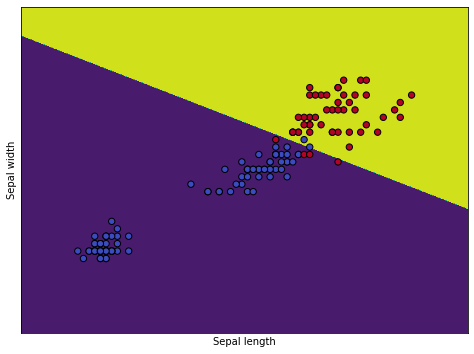

In [76]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
))

svm_clf.fit(X, y)
Draw(svm_clf)

Remember that unlike Logistic Regression classifiers, SVM classifiers do not output probabilities for each class.

In [38]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Alternatively, you could use the SVC class, using `SVC(kernel="linear", C=1)`, but it is much slower,
especially with large training sets, so it is not recommended. Another option is to use the `SGDClassifier`
class, with `SGDClassifier(loss="hinge", alpha=1/(m*C))`. This applies regular Stochastic
Gradient Descent to train a linear SVM classifier. It does not converge as fast as the
`LinearSVC` class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core training), or to handle online classification tasks.

The `LinearSVC` class regularizes the bias term, so you should center the training set first by subtracting its mean. This is
automatic if you scale the data using the `StandardScaler`. Moreover, make sure you set the loss hyperparameter to "hinge", as
it is not the default value. Finally, for better performance you should set the `dual` hyperparameter to `False`, unless there are more
features than training instances.

### Nonlinear SVM Classification

#### Polynomial Features

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets
are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more
features, such as polynomial features. To implement this idea using Scikit-Learn, you can create a `Pipeline` containing a PolynomialFeatures
transformer followed by a `StandardScaler` and a `LinearSVC`.

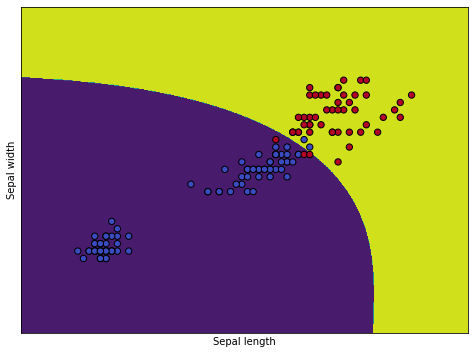

In [77]:
Polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

Polynomial_svm_clf.fit(X, y)
Draw(Polynomial_svm_clf)

#### Polynomial Kernel

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning
algorithms (not just SVMs), but at a low polynomial degree it cannot deal with very complex datasets,
and with a high polynomial degree it creates a huge number of features, making the model too slow. 

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the
kernel trick (it is explained in a moment). It makes it possible to get the same result as if you added many
polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features since you don’t actually add any features.

This code below trains an SVM classifier using a 3rd-degree polynomial kernel.

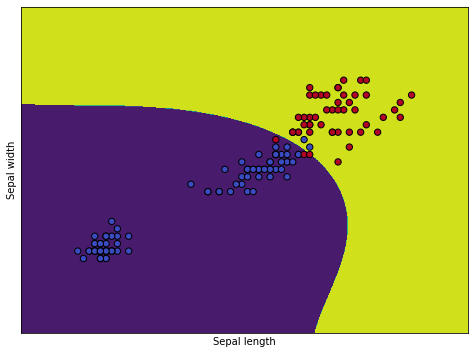

In [78]:
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)
Draw(poly_kernel_svm_clf)

On the right is another SVM classifier using a 10th-degree polynomial kernel. Obviously, if
your model is overfitting, you might want to reduce the polynomial degree. Conversely, if it is
underfitting, you can try increasing it. The hyperparameter coef0 controls how much the model is
influenced by high-degree polynomials versus low-degree polynomials.

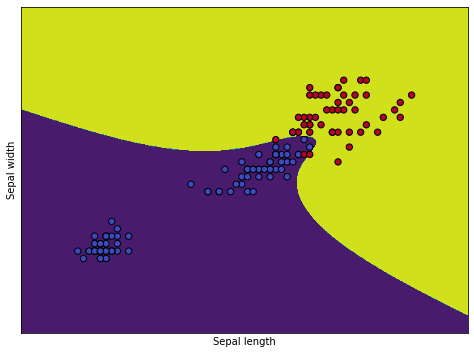

In [79]:
poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
))
poly_kernel_svm_clf.fit(X, y)
Draw(poly_kernel_svm_clf)

# Regression with Support Vector Machines (SVR)

As we mentioned earlier, the SVM algorithm is quite versatile: not only does it support linear and
nonlinear classification, but it also supports linear and nonlinear regression. The trick is to reverse the
objective: instead of trying to fit the largest possible street between two classes while limiting margin
violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin
violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter ϵ.

Maximising the margin can more generally be seen as regularising the solution by minimising $w$ (which is essentially minimising model complexity) this is done both in the classification and regression. But in the case of classification this minimisation is done under the condition that all examples are classified correctly and in the case of regression under the condition that the value $y$ of all examples deviates less than the required accuracy $\epsilon$ from $f(x)$ for regression.

Let's see how both SVM and SVR  apply the same SVM theory to formulate the problem as a convex optimisation problem. Here we ignore slack variables that allow us for misclassifications and deviations above accuracy $\epsilon$.


**Classification**

In this case the goal is to find a function $f(x)= wx +b$ where $f(x) \geq 1$ for positive examples and $f(x) \leq -1$ for negative examples. Under these conditions we want to maximise the margin (distance between the 2 red bars) which is nothing more than minimising the derivative of $f'=w$. 

The intuition behind **maximising the margin** is that this will give us a unique solution to the problem of finding $f(x)$ (i.e. we discard for example the blue line) *and* also that this solution is the most general under these conditions, i.e. it acts as a **regularisation**. This can be seen as, around the decision boundary (where red and black lines cross) the classification uncertainty is the biggest and choosing the lowest value for $f(x)$ in this region will yield the most general solution.
 
![SVR1](https://drive.google.com/uc?export=view&id=1TuvPogGEzq5uZBbierdOjwBir1U7nPAL)

The data points at the 2 red bars are the support vectors in this case, they correspond to the non-zero Lagrange multipliers of the equality part of the inequality conditions $f(x) \geq 1$ and $f(x) \leq -1$

### Regression

In this case the goal is to find a function $f(x)= wx +b$ (red line) under the condition that $f(x)$ is within a required accuracy $\epsilon$ from the value value $y(x)$ (black bars) of every data point, i.e.  $|y(x) -f(x)|\leq \epsilon$ where $epsilon$ is the distance between the red and the grey line. Under this condition we again want to minimise $f'(x)=w$, again for the reason of regularisation and to obtain a unique solution as the result of the convex optimisation problem. One can see how minimising $w$ results in a more general case as the extreme value of $w=0$ would mean no functional relation at all which is the most general result one can obtain from the data.

![SVR1](https://drive.google.com/uc?export=view&id=13j3ha7UWFQ_eQadBNZstr4n7wbJ8Up4-)

The data points at the 2 red bars are the support vectors in this case, they correspond to the non-zero Lagrange multipliers of the equality part of the inequality condition $|y -f(x)|\leq \epsilon$.

### Conclusion

Both cases result in the following problem:

$$ \text{min} \frac{1}{2}w^2 $$ 

Under the condition that:

- All examples are classified correctly (Classification)
- The value $y$ of all examples deviates less than $\epsilon$ from $f(x)$. (Regression)

## Showcase

### SVM Regression

The code below shows two linear SVM Regression models trained on some random linear data, one with a
large margin (ϵ = 1.5) and the other with a small margin (ϵ = 0.5).


In [80]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()


The SVR class is the regression equivalent of the `SVC` class, and
the `LinearSVR` class is the regression equivalent of the `LinearSVC` class.

The `LinearSVR` class scales
linearly with the size of the training set (just like the `LinearSVC` class), while the `SVR` class gets much too
slow when the training set grows large (just like the `SVC` class).

In [81]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

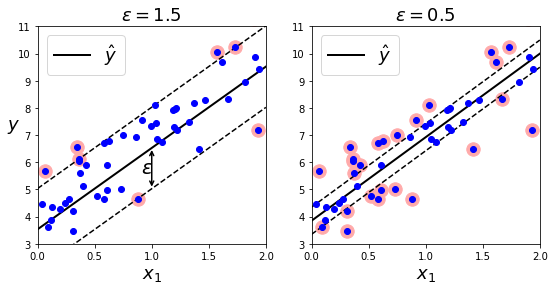

In [82]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

Adding more training instances within the margin does not affect the model’s predictions; thus, the model
is said to be *ϵ-insensitive*.
You can use Scikit-Learn’s `LinearSVR` class to perform linear SVM Regression.

### SVM regression using a 2nd-degree polynomial kernel

To tackle nonlinear regression tasks, you can use a kernelized SVM model. The code below shows SVM Regression on a random quadratic training set, using a 2nd-degree polynomial kernel. There
is little regularization on the left plot (i.e., a large C value), and much more regularization on the right plot
(i.e., a small C value).

In [83]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

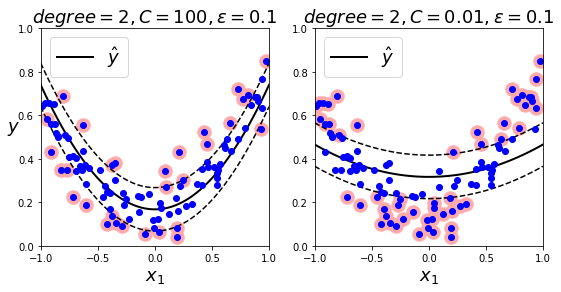

In [84]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma='auto')
svm_poly_reg.fit(X, y)

from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma='auto')
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma='auto')
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

## Showcase - Support Vector Machines for regime/trend prediction

Let me begin by explaining the agenda here:

1. Create an unsupervised ML algorithm to predict the regimes.
2. Plot these regimes to visualize them.
3. Train a Support Vector Classifier algorithm with the regime as one of the features.
4. Use this Support Vector Classifier algorithm to predict the current day’s trend at the Opening of the market.
5. Visualize the performance of this strategy on the test data.

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import seaborn as sns 
import matplotlib.pyplot as plt
import talib as ta
from sklearn import mixture as mix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import yfinance as yf

In [3]:
# Read the data from Yahoo
df= pdr.get_data_yahoo('SPY', '2000-01-01', '2012-01-01')

df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]
df.head()

,Open,High,Low,Close
Date,,,,
2000-01-03,148.25000,148.25000,143.875000,145.4375
2000-01-04,143.53125,144.06250,139.640625,139.7500
2000-01-05,139.93750,141.53125,137.250000,140.0000
2000-01-06,139.62500,141.50000,137.750000,137.7500
2000-01-07,140.31250,145.75000,140.062500,145.7500


In [10]:
df2= pdr.get_data_yahoo('SPY', '2000-01-01', '2012-01-01')
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,98.146072
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,94.307983
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,94.476685
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,92.958336
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,98.356987


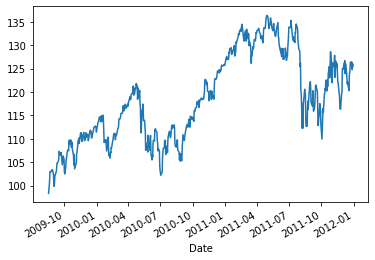

In [21]:
df.iloc[-600:, -1].plot()

In [4]:
n = 10  # look back period of 10 days
t = 0.8 # 80% data for training and remaining 20% data for testing
split =int(t*len(df))

Let's shift the High, Low and Close columns by 1, to access only the past data. After this, let's created various technical indicators such as, RSI, SMA, ADX, Correlation, Parabolic SAR, and the Return of the past 1- day on an Open to Open basis.

In [5]:
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)
df['RSI']=ta.RSI(np.array(df['close']), timeperiod=n)
df['SMA']= df['close'].rolling(window=n).mean()
df['Corr']= df['SMA'].rolling(window=n).corr(df['close'])
df['SAR']=ta.SAR(np.array(df['high']),np.array(df['low']),\
                  0.2,0.2)
df['ADX']=ta.ADX(np.array(df['high']),np.array(df['low']),\
                  np.array(df['close']), timeperiod =n)
df['Corr'][df.Corr>1]=1
df['Corr'][df.Corr<-1]=-1 
df['Return']= np.log(df['Open']/df['Open'].shift(1))

print(df.head())

df=df.dropna()

                 Open       High         Low     Close       high         low  \
Date                                                                            
2000-01-03  148.25000  148.25000  143.875000  145.4375        NaN         NaN   
2000-01-04  143.53125  144.06250  139.640625  139.7500  148.25000  143.875000   
2000-01-05  139.93750  141.53125  137.250000  140.0000  144.06250  139.640625   
2000-01-06  139.62500  141.50000  137.750000  137.7500  141.53125  137.250000   
2000-01-07  140.31250  145.75000  140.062500  145.7500  141.50000  137.750000   

               close  RSI  SMA  Corr         SAR  ADX    Return  
Date                                                             
2000-01-03       NaN  NaN  NaN   NaN         NaN  NaN       NaN  
2000-01-04  145.4375  NaN  NaN   NaN         NaN  NaN -0.032347  
2000-01-05  139.7500  NaN  NaN   NaN  148.250000  NaN -0.025357  
2000-01-06  140.0000  NaN  NaN   NaN  146.528125  NaN -0.002236  
2000-01-07  137.7500  NaN  NaN   NaN

- Clustering refers to grouping similar data points together, based on their attributes or features.

- Gaussian Mixture Models (GMMs) are a powerful clustering algorithm which improve the k-means clustering algorithm by considering higher order monets.

- Gaussian Mixture Models assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster. Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.Clustering refers to grouping similar data points together, based on their attributes or features.

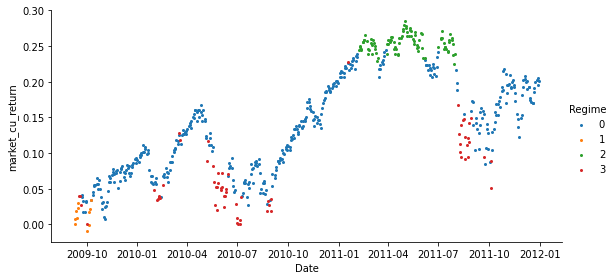

Mean for regime 0:  -0.01354361468026196
Co-Variance for regime 0:  0.34228226342462287
Mean for regime 1:  -1.3584140837627232
Co-Variance for regime 1:  0.37004225826594567
Mean for regime 2:  1.1515138267969611
Co-Variance for regime 2:  0.39132398659487155
Mean for regime 3:  -0.801900436799713
Co-Variance for regime 3:  1.1814840292494673
        Date  Regime        Open        high         low       close  \
0 2009-09-09       1  103.120003  103.050003  102.389999  102.940002   
1 2009-09-10       1  103.800003  104.080002  102.800003  103.730003   
2 2009-09-11       1  104.989998  104.860001  103.220001  104.790001   
3 2009-09-14       1  103.879997  105.300003  104.279999  104.769997   
4 2009-09-15       1  105.449997  105.459999  103.150002  105.279999   

         RSI      SMA      Corr         SAR        ADX    Return  \
0  61.016205  102.124 -0.712279   99.570000  27.067911  0.001164   
1  64.627979  102.181 -0.591800  100.266000  27.615840  0.006573   
2  68.920785  102

In [6]:
# created an unsupervised learning algorithm to make the regime prediction

ss= StandardScaler()
unsup = mix.GaussianMixture(n_components=4, 
                            covariance_type="spherical", 
                            n_init=100, 
                            random_state=42)
df=df.drop(['High','Low','Close'],axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1,df.shape[1])))
regime = unsup.predict(np.reshape(ss.transform(df[split:]),\
                                                   (-1,df.shape[1])))

Regimes=pd.DataFrame(regime,columns=['Regime'],index=df[split:].index)\
                     .join(df[split:], how='inner')\
                          .assign(market_cu_return=df[split:]\
                                  .Return.cumsum())\
                                  .reset_index(drop=False)\
                                  .rename(columns={'index':'Date'})

order=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes,hue='Regime',hue_order=order,aspect=2,height= 4)
fig.map(plt.scatter,'Date','market_cu_return', s=4).add_legend()
plt.show()

for i in order:
    print('Mean for regime %i: '%i,unsup.means_[i][0])
    print('Co-Variance for regime %i: '%i,(unsup.covariances_[i]))

print(Regimes.head())





In the above code, we created an unsupervised-algo that will divide the market into 4 regimes, based on the criterion of its own choosing. We have not provided any train dataset with labels. Next, we will fit the data and predict the regimes. Then we will be storing these regime predictions in a new variable called regime.

This graph looks pretty good. Without actually looking at the factors based on which the classification was done, we can conclude a few things just by looking at the chart.

- The # zone is the low volatility or the sideways zone
- The # zone is high volatility zone or panic zone.
- The # zone is a breakout zone.
- The # zone: Not entirely sure but let us find out.

The data can be inferred as follows:

- Regime 0: Low mean and High covariance.
- Regime 1: High mean and High covariance.
- Regime 2: High mean and Low covariance.
- Regime 3: Low mean and Low covariance.

We scale the Regimes data frame, excluding the Date and Regimes columns, created in the earlier piece of code and saved it back in the same columns. By doing so, we will not be losing any features but the data will be scaled and ready for training the support vector classifier algorithm. Next, we create a signal column which would act as the prediction values. The algorithm would train on the features’ set to predict this signal.

In [7]:
ss1 =StandardScaler()
columns =Regimes.columns.drop(['Regime','Date'])    
Regimes[columns]= ss1.fit_transform(Regimes[columns])
Regimes['Signal']=0
Regimes.loc[Regimes['Return']>0,'Signal']=1
Regimes.loc[Regimes['Return']<0,'Signal']=-1
Regimes['return'] = Regimes['Return'].shift(1)
Regimes=Regimes.dropna()

In [8]:
Regimes.tail(100)

,Date,Regime,Open,high,low,close,RSI,SMA,Corr,SAR,ADX,Return,market_cu_return,Signal,return
484,2011-08-10,3,-0.396721,-0.219955,-0.834334,-0.151225,-1.795469,0.592173,1.094155,0.464805,2.376789,0.835005,-0.365778,1,-2.075496
485,2011-08-11,3,-0.615296,-0.369532,-0.652313,-0.717870,-2.230656,0.390797,1.113761,0.200741,2.822828,-1.485597,-0.593953,-1,0.835005
486,2011-08-12,3,-0.053558,-0.079177,-0.612225,-0.167602,-1.276943,0.249032,0.967933,-0.855514,2.908502,3.665122,-0.015410,1,-1.485597
487,2011-08-15,3,0.032779,-0.047282,-0.074829,-0.081350,-1.143359,0.125743,0.775501,-0.677920,2.953363,0.524730,0.071277,1,3.665122
488,2011-08-16,3,0.063379,0.120993,0.111526,0.191600,-0.729547,0.035998,0.344989,-0.638807,2.825583,0.166541,0.101863,1,0.524730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,2011-12-23,0,0.740962,0.633514,0.678175,0.699286,0.195843,0.502098,-1.161779,0.212161,-1.099365,0.662883,0.761375,1,0.440028
580,2011-12-27,0,0.795606,0.746797,0.806023,0.821568,0.454205,0.505838,-1.659876,0.318505,-1.124503,0.301733,0.813136,1,0.662883
581,2011-12-28,0,0.832764,0.789690,0.876447,0.832486,0.477527,0.530913,-1.910933,0.425357,-1.105276,0.195235,0.848216,1,0.301733
582,2011-12-29,0,0.693968,0.757795,0.732348,0.651248,-0.114141,0.550490,-2.066356,0.519084,-1.273841,-0.868472,0.716696,-1,0.195235


Date
2011-07-18    1
2011-07-19    1
2011-07-20    1
2011-07-21    1
2011-07-22    1
             ..
2011-12-23    1
2011-12-27    1
2011-12-28    1
2011-12-29    1
2011-12-30    1
Name: Pred_Signal, Length: 117, dtype: int64


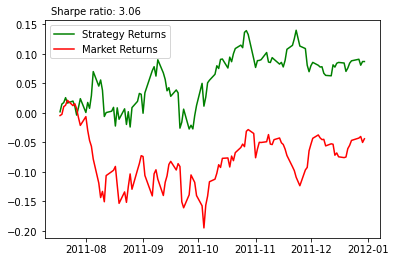

In [28]:
# SVM Classifier       
cls= SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

split2= int(.8*len(Regimes))

X = Regimes.drop(['Signal','Return','market_cu_return','Date'], axis=1)
y= Regimes['Signal']

cls.fit(X[:split2],y[:split2])

p_data=len(X)-split2

df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')]=cls.predict(X[split2:])

print(df['Pred_Signal'][-p_data:])

df['str_ret'] =df['Pred_Signal']*df['Return'].shift(-1)

df['strategy_cu_return']=0.
df['market_cu_return']=0.
df.iloc[-p_data:,df.columns.get_loc('strategy_cu_return')] \
       = np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')] \
       = np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])\
           /np.nanstd(df['strategy_cu_return'][-p_data:])

plt.plot(df['strategy_cu_return'][-p_data:],color='g',label='Strategy Returns')
plt.plot(df['market_cu_return'][-p_data:],color='r',label='Market Returns')
plt.figtext(0.14,0.9,s='Sharpe ratio: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()